In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Himmelblau's function
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Gradient of Himmelblau's function
def himmelblau_grad(x, y):
    df_dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([df_dx, df_dy])

# Generate data
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

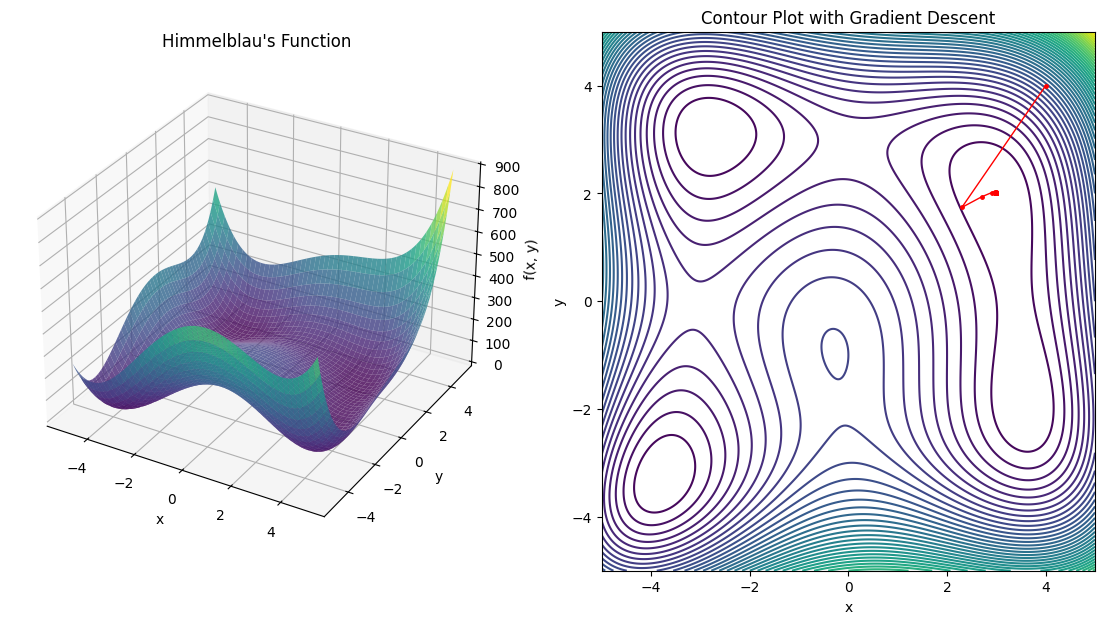

In [4]:
fig = plt.figure(figsize=(14, 7))

# 3D surface plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title("Himmelblau's Function")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# 2D contour plot with gradients
ax2 = fig.add_subplot(122)
contours = ax2.contour(X, Y, Z, 50, cmap='viridis')
ax2.set_title("Contour Plot with Gradient Descent")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Starting point for gradient descent
start_point = np.array([4.0, 4.0])
path = [start_point]
point = start_point

# Gradient descent parameters
learning_rate = 0.01
iterations = 50

# Perform gradient descent
for _ in range(iterations):
    grad = himmelblau_grad(point[0], point[1])
    next_point = point - learning_rate * grad
    path.append(next_point)
    point = next_point

path = np.array(path)

# Plot the path of gradient descent
ax2.plot(path[:, 0], path[:, 1], 'r.-', markersize=5, lw=1)

plt.show()
